In [1]:
library(SpatialExperiment)
library(Matrix)
library(readr)
library(Statial)
library(tidyr)
library(ggplot2)
library(patchwork)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [2]:
df1 = read.csv('178248A.016um.abundances.csv',sep=',',check.names = FALSE)
df2 = read.csv('18s18941-T2.016um.abundances.csv',sep=',',check.names = FALSE)
df3 = read.csv('17s30980&18s18941.016um.abundances.csv',sep=',',check.names = FALSE)

In [3]:
df = rbind(df1, df2, df3)

In [4]:
df

,Unassigned,Smooth muscle,Macrophage,Endothelial,Hepatocyte,CAF,CD8T,CD4T,Neutrophil,B cell,CT,group,batch,Macrophage.p,CAF.p,CD4T.p,CD8T.p,B cell.p
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s_016um_00290_00411-1,0,12,49,26,544,25,11,19,1,8,Hepatocyte,DN,178248A,0.099796334,0.1046025105,0.1507936508,0.0758620690,0.1818181818
s_016um_00329_00125-1,131,42,32,112,380,147,25,36,3,8,Hepatocyte,tumor,178248A,0.027118644,0.0301972062,0.0221266134,0.0224416517,0.0063795853
s_016um_00258_00092-1,0,14,5,33,784,68,2,2,0,8,Hepatocyte,tumor,178248A,0.004237288,0.0139687757,0.0012292563,0.0017953321,0.0063795853
s_016um_00245_00212-1,0,11,16,42,744,73,7,16,1,6,Hepatocyte,tumor,178248A,0.013559322,0.0149958915,0.0098340504,0.0062836625,0.0047846890
s_016um_00283_00339-1,0,1,18,1,890,0,4,1,1,0,Hepatocyte,DN,178248A,0.036659878,0.0000000000,0.0079365079,0.0275862069,0.0000000000
s_016um_00417_00360-1,0,1,0,0,509,0,0,0,0,0,Hepatocyte,normal,178248A,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
s_016um_00310_00015-1,0,6,42,13,819,11,4,7,0,0,Hepatocyte,tumor,178248A,0.035593220,0.0022596549,0.0043023970,0.0035906643,0.0000000000
s_016um_00244_00289-1,0,2,12,18,864,8,5,7,0,0,Hepatocyte,DN,178248A,0.024439919,0.0334728033,0.0555555556,0.0344827586,0.0000000000
s_016um_00234_00009-1,0,0,29,5,566,2,1,1,0,0,Hepatocyte,tumor,178248A,0.024576271,0.0004108463,0.0006146281,0.0008976661,0.0000000000


In [5]:
table(df$group)


      DN   normal    P7_DN P7_Tumor    P8_DN P8_Tumor    tumor 
   52462     6880    43363    20856    50696     4999    50542 

In [6]:
df$group <- gsub("P7_DN", "DN", df$group)
df$group <- gsub("P8_DN", "DN", df$group)
df$group <- gsub("P7_Tumor", "Tumor", df$group)
df$group <- gsub("P8_Tumor", "Tumor", df$group)
df$group <- gsub("tumor", "Tumor", df$group)

In [7]:
write.table(df,'abundances.csv',row.names=T,sep=',')

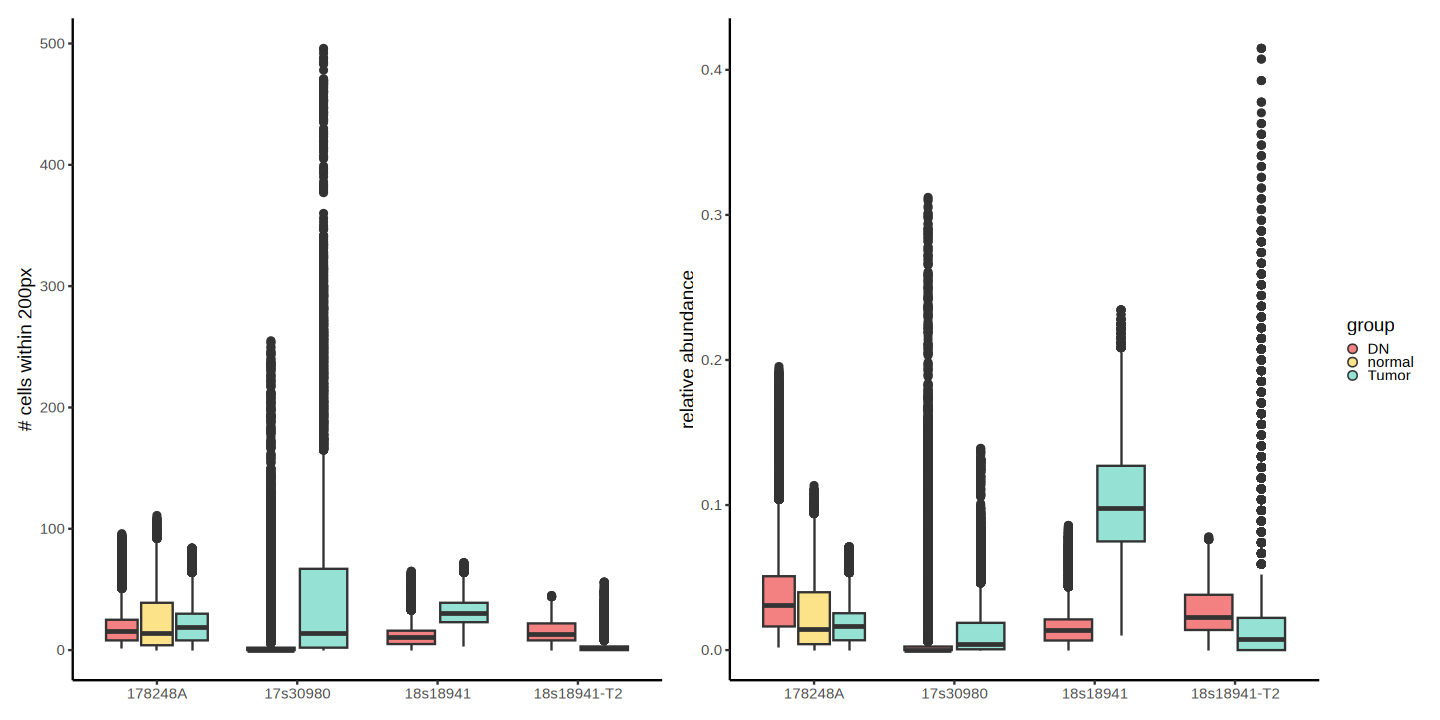

In [8]:
options(repr.plot.width = 12, repr.plot.height = 6)
plota = ggplot(df, aes(x=batch, y=Macrophage, fill=group)) + 
    labs(y="# cells within 200px")+
ggplot(df, aes(x=batch, y=Macrophage.p, fill=group)) + 
    labs(y="relative abundance") +
    plot_layout(nrow=1, guides="collect") & 
    geom_boxplot(key_glyph="point") & 
    scale_fill_manual(values=c("#F38181", "#FCE38A",'#95E1D3')) & 
    guides(fill=guide_legend(override.aes=list(shape=21, size=2))) &
    theme_classic() & theme(
        axis.title.x=element_blank(),
        legend.key.size=unit(0, "lines"))
ggsave("Macrophage.tiff", 
       plot =  plota,
       device = "tiff",
       dpi = 600,
       width = 24,
       height = 6,  
       units = "in") 
plota

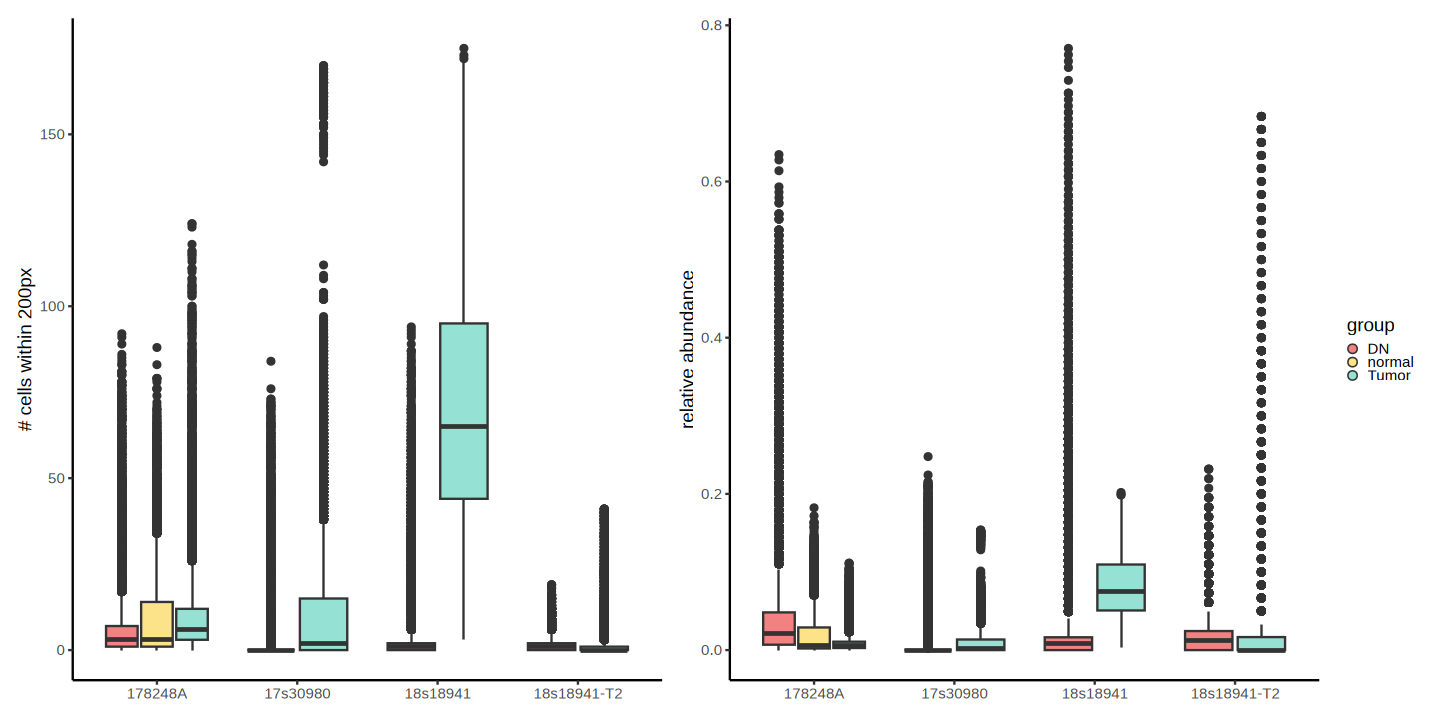

In [9]:
options(repr.plot.width = 12, repr.plot.height = 6)
plota = ggplot(df, aes(x=batch, y=CD8T, fill=group)) + 
    labs(y="# cells within 200px")+
ggplot(df, aes(x=batch, y=CD8T.p, fill=group)) + 
    labs(y="relative abundance") +
    plot_layout(nrow=1, guides="collect") & 
    geom_boxplot(key_glyph="point") & 
    scale_fill_manual(values=c("#F38181", "#FCE38A",'#95E1D3')) & 
    guides(fill=guide_legend(override.aes=list(shape=21, size=2))) &
    theme_classic() & theme(
        axis.title.x=element_blank(),
        legend.key.size=unit(0, "lines"))
ggsave("CD8T.tiff", 
       plot =  plota,
       device = "tiff",
       dpi = 600,
       width = 24,
       height = 6,  
       units = "in") 
plota

In [10]:
colnames(df)

[1] "Unassigned"    "Smooth muscle" "Macrophage"    "Endothelial"  
 [5] "Hepatocyte"    "CAF"           "CD8T"          "CD4T"         
 [9] "Neutrophil"    "B cell"        "CT"            "group"        
[13] "batch"         "Macrophage.p"  "CAF.p"         "CD4T.p"       
[17] "CD8T.p"        "B cell.p"

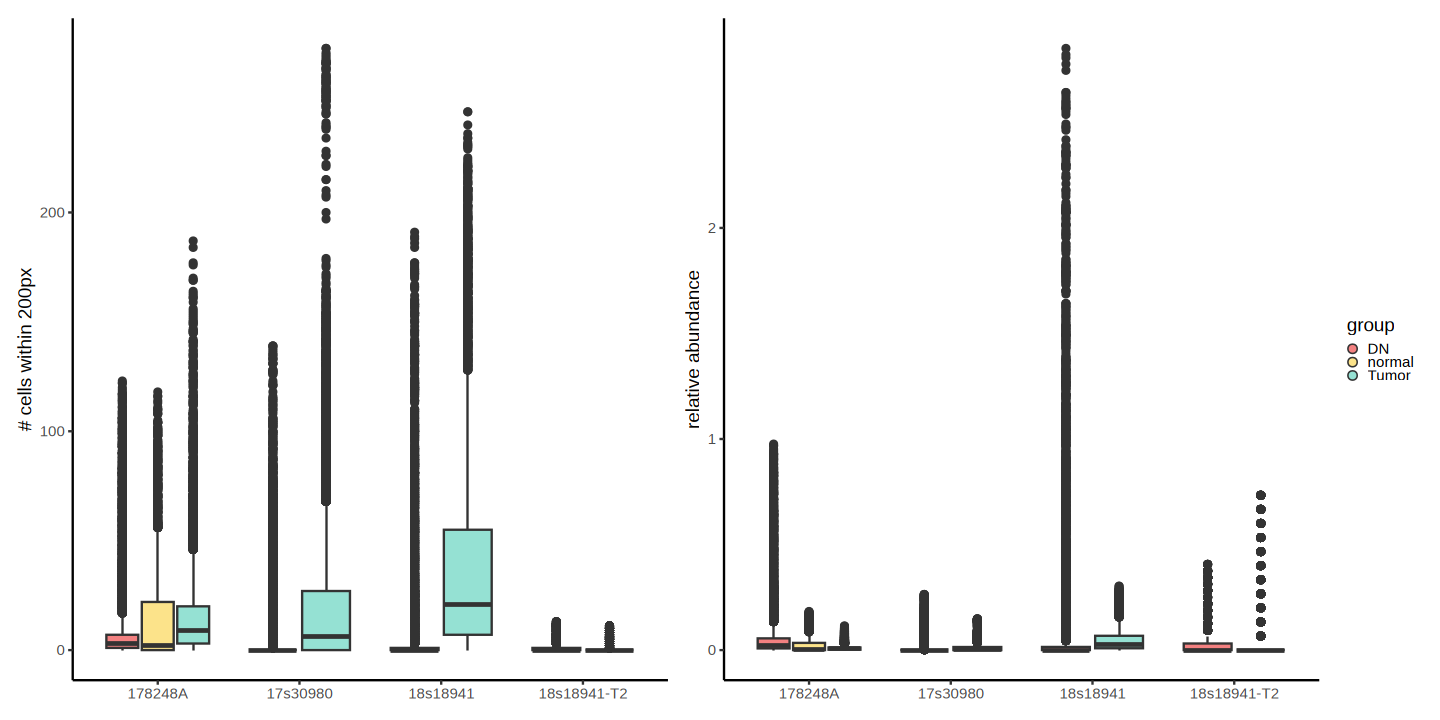

In [11]:
options(repr.plot.width = 12, repr.plot.height = 6)
plota = ggplot(df, aes(x=batch, y=CD4T, fill=group)) + 
    labs(y="# cells within 200px")+
ggplot(df, aes(x=batch, y=CD4T.p, fill=group)) + 
    labs(y="relative abundance") +
    plot_layout(nrow=1, guides="collect") & 
    geom_boxplot(key_glyph="point") & 
    scale_fill_manual(values=c("#F38181", "#FCE38A",'#95E1D3')) & 
    guides(fill=guide_legend(override.aes=list(shape=21, size=2))) &
    theme_classic() & theme(
        axis.title.x=element_blank(),
        legend.key.size=unit(0, "lines"))
ggsave("CD4T.tiff", 
       plot =  plota,
       device = "tiff",
       dpi = 600,
       width = 24,
       height = 6,  
       units = "in") 
plota

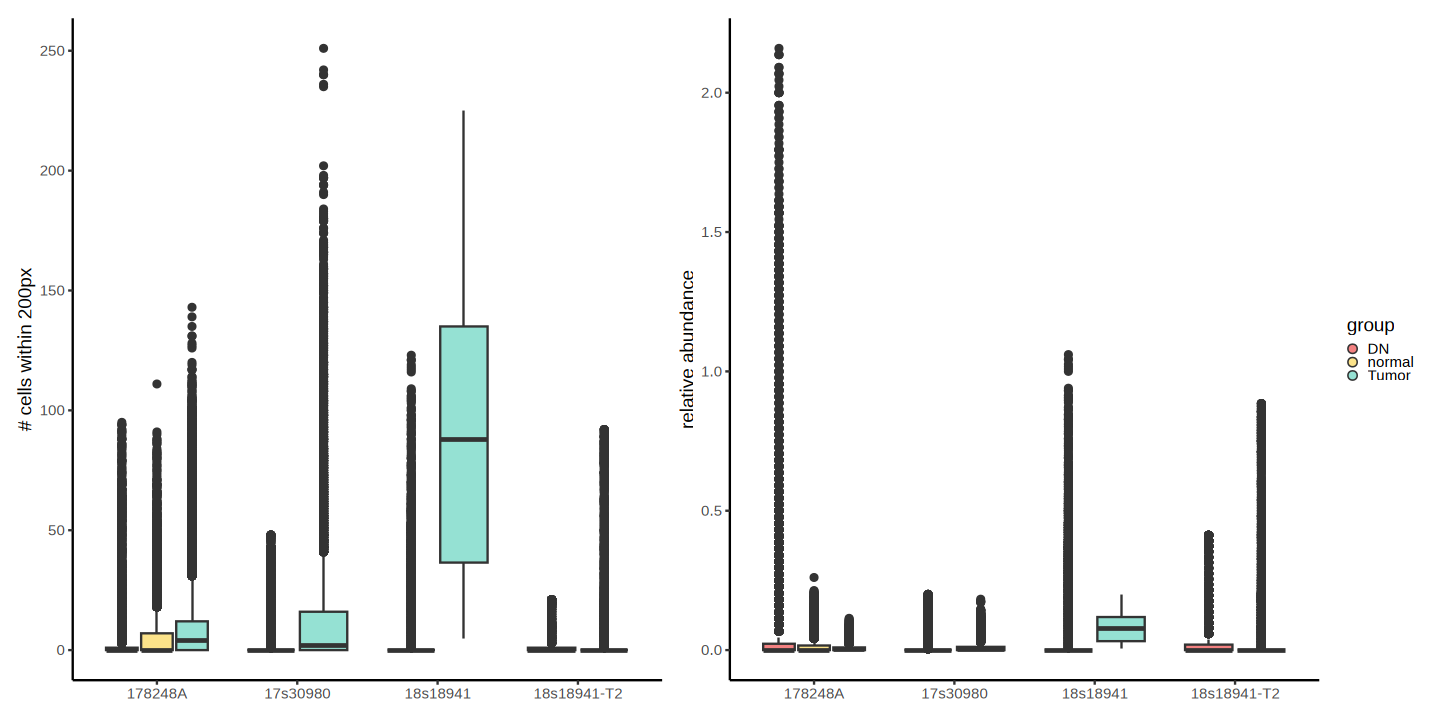

In [12]:
options(repr.plot.width = 12, repr.plot.height = 6)
plota = ggplot(df, aes(x=batch, y=`B cell`, fill=group)) + 
    labs(y="# cells within 200px")+
ggplot(df, aes(x=batch, y=`B cell.p`, fill=group)) + 
    labs(y="relative abundance") +
    plot_layout(nrow=1, guides="collect") & 
    geom_boxplot(key_glyph="point") & 
    scale_fill_manual(values=c("#F38181", "#FCE38A",'#95E1D3')) & 
    guides(fill=guide_legend(override.aes=list(shape=21, size=2))) &
    theme_classic() & theme(
        axis.title.x=element_blank(),
        legend.key.size=unit(0, "lines"))
ggsave("B cell.tiff", 
       plot =  plota,
       device = "tiff",
       dpi = 600,
       width = 24,
       height = 6,  
       units = "in") 
plota

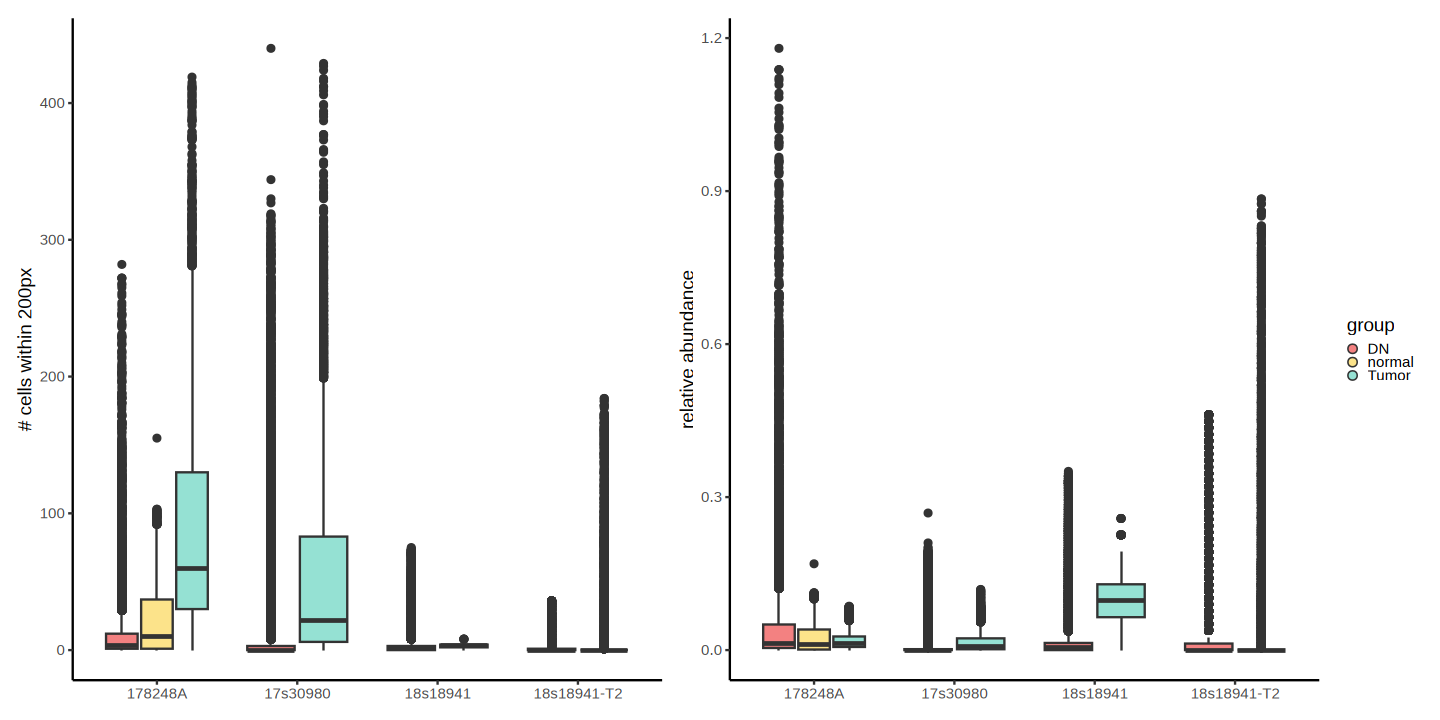

In [13]:
options(repr.plot.width = 12, repr.plot.height = 6)
plota = ggplot(df, aes(x=batch, y=CAF, fill=group)) + 
    labs(y="# cells within 200px")+
ggplot(df, aes(x=batch, y=CAF.p, fill=group)) + 
    labs(y="relative abundance") +
    plot_layout(nrow=1, guides="collect") & 
    geom_boxplot(key_glyph="point") & 
    scale_fill_manual(values=c("#F38181", "#FCE38A",'#95E1D3')) & 
    guides(fill=guide_legend(override.aes=list(shape=21, size=2))) &
    theme_classic() & theme(
        axis.title.x=element_blank(),
        legend.key.size=unit(0, "lines"))
ggsave("CAF.tiff", 
       plot =  plota,
       device = "tiff",
       dpi = 600,
       width = 24,
       height = 6,  
       units = "in") 
plota

In [14]:
tmp= subset(df,batch=='17s30980')
table(tmp[c('group','CD8T')])

       CD8T
group       0     1     2     3     4     5     6     7     8     9    10    11
  DN    34294  3354  1856  1092   141   150    92    88    84    78    65    91
  Tumor  6727  3515   881   567   528   464   434   463   382   337   351   210
       CD8T
group      12    13    14    15    16    17    18    19    20    21    22    23
  DN      116    88    76   109    94    79    80    61    63    63    98    63
  Tumor   244   258   262   209   167   163   148   126   160   147   160   146
       CD8T
group      24    25    26    27    28    29    30    31    32    33    34    35
  DN       48    39    39    56    46    42    73    39    46    66    59    35
  Tumor   157   141   178   149   159   158   125   111   143    91   105    94
       CD8T
group      36    37    38    39    40    41    42    43    44    45    46    47
  DN       26    29    20    43    17    21    16    13     8    12    15    13
  Tumor    89   110    97    87    73    56    65    49    53    72    5

In [18]:
df

,Unassigned,Smooth muscle,Macrophage,Endothelial,Hepatocyte,CAF,CD8T,CD4T,Neutrophil,B cell,CT,group,batch,Macrophage.p,CAF.p,CD4T.p,CD8T.p,B cell.p
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s_016um_00290_00411-1,0,12,49,26,544,25,11,19,1,8,Hepatocyte,DN,178248A,0.099796334,0.1046025105,0.1507936508,0.0758620690,0.1818181818
s_016um_00329_00125-1,131,42,32,112,380,147,25,36,3,8,Hepatocyte,Tumor,178248A,0.027118644,0.0301972062,0.0221266134,0.0224416517,0.0063795853
s_016um_00258_00092-1,0,14,5,33,784,68,2,2,0,8,Hepatocyte,Tumor,178248A,0.004237288,0.0139687757,0.0012292563,0.0017953321,0.0063795853
s_016um_00245_00212-1,0,11,16,42,744,73,7,16,1,6,Hepatocyte,Tumor,178248A,0.013559322,0.0149958915,0.0098340504,0.0062836625,0.0047846890
s_016um_00283_00339-1,0,1,18,1,890,0,4,1,1,0,Hepatocyte,DN,178248A,0.036659878,0.0000000000,0.0079365079,0.0275862069,0.0000000000
s_016um_00417_00360-1,0,1,0,0,509,0,0,0,0,0,Hepatocyte,normal,178248A,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
s_016um_00310_00015-1,0,6,42,13,819,11,4,7,0,0,Hepatocyte,Tumor,178248A,0.035593220,0.0022596549,0.0043023970,0.0035906643,0.0000000000
s_016um_00244_00289-1,0,2,12,18,864,8,5,7,0,0,Hepatocyte,DN,178248A,0.024439919,0.0334728033,0.0555555556,0.0344827586,0.0000000000
s_016um_00234_00009-1,0,0,29,5,566,2,1,1,0,0,Hepatocyte,Tumor,178248A,0.024576271,0.0004108463,0.0006146281,0.0008976661,0.0000000000


In [20]:
table(df1[c('group','CT')])

        CT
group    Hepatocyte
  DN          23520
  normal       6880
  tumor       22218